In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(Path("../Resources/relabeled_data.csv"))
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current_assets                 78682 non-null  float64
 1   cost_of_goods_sold             78682 non-null  float64
 2   depreciation_and_amortization  78682 non-null  float64
 3   EBITDA                         78682 non-null  float64
 4   inventory                      78682 non-null  float64
 5   net_income                     78682 non-null  float64
 6   total_receivables              78682 non-null  float64
 7   market_value                   78682 non-null  float64
 8   net_sales                      78682 non-null  float64
 9   total_assets                   78682 non-null  float64
 10  total_long_term_debt           78682 non-null  float64
 11  EBIT                           78682 non-null  float64
 12  gross_profit                   78682 non-null 

In [5]:
data.shape

(78682, 19)

In [6]:
data.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307,0.066343
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038,0.248882
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000,0.000000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500,0.000000
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000,0.000000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250,0.000000
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000,1.000000


In [7]:
data["status"].value_counts()

0    73462
1     5220
Name: status, dtype: int64

In [8]:
bankrupt = data["status"].value_counts()[1]
print("The number of bankrupt companies in data set is", data["status"].value_counts()[1])

The number of bankrupt companies in data set is 5220


In [9]:
stable = data["status"].value_counts()[0]
print("The number of stable companies in data set is", data["status"].value_counts()[0])

The number of stable companies in data set is 73462


In [10]:
Ratio = bankrupt / stable
print(Ratio)

0.07105714519071084


#Financial Ratios
Current Ratio
Quick Ratio
Absolute Liquidity Ratio
Cash Ratio
Inventory Turnover Ratio
Receivables Turnover Ratio
Capital Turnover Ratio
Asset Turnover Ratio
Net Working Capital Ratio
Cash Conversion Cycle
Earnings Margin
Return on Investment
Return on Equity
Earnings Per Share
Operating Leverage
Financial leverage
Total Leverage
Debt-Equity Ratio
Interest Coverage Ratio
Debt Service Coverage Ratio
Fixed Asset Ratio
Current Asset to Fixed Asset
Proprietary Ratio
Fixed Interest Cover
Fixed Dividend Cover
Capacity Ratio
Activity Ratio
Efficiency Ratio

# Financial Ratios

## Liquidity

In [11]:
current_ratio = data['current_assets']/data['total_current_liabilities']
data['current_ratio'] = current_ratio

In [12]:
quick_ratio = (data['current_assets']-data['inventory'])/data['total_current_liabilities']
data['quick_ratio'] = quick_ratio

In [13]:
net_working_capital_to_sales_ratio = (data['current_assets']-data['total_current_liabilities'])/data['net_sales']
data['net_working_capital_to_sales_ratio'] = net_working_capital_to_sales_ratio

## Profitability

In [14]:
gross_profit_margin = data['gross_profit']/data['net_sales']
data['gross_profit_margin'] = gross_profit_margin

In [15]:
net_profit_margin = data["net_income"]/data["net_sales"]
data['net_profit_margin'] = net_profit_margin

In [16]:
operating_income = data["gross_profit"] - data["total_operationg_expenses"]
data['operating_income'] = operating_income

In [17]:
operating_profit_margin = operating_income / data["net_sales"]
data['operating_profit_maring'] = operating_profit_margin

In [18]:
net_profit_margin = data["net_income"]/data["net_sales"]
data['net_profit_margin'] = net_profit_margin

## Activity

In [19]:
inventory_turnover = data["cost_of_goods_sold"] / data["inventory"]
data['inventory_turnover'] = inventory_turnover

In [20]:
total_asset_turnover = data["net_sales"] / data["total_assets"]
data['total_asset_turnover'] = total_asset_turnover

In [21]:
#accounts_receivables_turnover = data["Net credit sales / average ar

In [22]:
#fixed_asset_turnover = data["net_sales"]/fixed assets
#net fixed assets = gross fixed assets - accumulated depreciation

## Financial Leverage

In [23]:
total_debt = data["total_long_term_debt"]+data["total_current_liabilities"]
data['total_debt'] = total_debt

In [24]:
total_debt_to_asset = total_debt/data["total_assets"]
data['total_debt_to_asset'] = total_debt_to_asset

In [25]:
long_term_debt_to_assets = data["total_long_term_debt"]/data["total_assets"]
data['long_term_debt_to_assets'] = long_term_debt_to_assets

In [26]:
total_shareholders_equity = data["total_assets"]- data["total_liabilities"]
data['total_shareholders_equity'] = total_shareholders_equity

In [27]:
total_debt_to_equity_ratio = total_debt / total_shareholders_equity
data['total_debt_to_equity_ratio'] = np.where(data['total_shareholders_equity'] == 0, np.nan ,data['total_debt']/data['total_shareholders_equity'])
data.dropna(inplace=True)

In [28]:
equity_multiplier = data["total_assets"] / total_shareholders_equity
data['equity_multiplier'] = equity_multiplier

In [29]:
# EBIT = gross profit - operating expenses

In [30]:
#Times_interest_coverage = data["EBIT"] - 

In [31]:
#Fixed_charge_coverage_ratio = data["EBIT"] + Lease  / Interest + lease payment

## Shareholder Ratios

In [32]:
#earnings_per_share = Net income available to shareholders / number of shares outstanding

In [33]:
#dividens_per_share = dividends paid to shareholders / number of shares oustanding

In [34]:
#dividend_payout_ratios = dividends / earnings

In [35]:
#price_earnings_ratio = market_price_share / earnings_per_share

## Return Ratios

In [36]:
basic_earning_power = operating_income / data["total_assets"]
data['basic_earning_power'] = basic_earning_power

In [37]:
return_on_assets = data["net_income"] / data["total_assets"]
data['return_on_assets'] = return_on_assets

In [38]:
return_on_equity = data["net_income"] / total_shareholders_equity
data['return_on_equity'] = return_on_equity

# Original Dataset + Ratios

## Save Data and Ratios to a separate csv file

In [39]:
data_ratios = pd.DataFrame(data)

In [40]:
data_ratios.to_csv("data_ratios.csv")

## Review Data and Ratios

In [41]:
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,...,1.382369,344.263,0.464594,0.243519,339.515,1.013985,2.182519,-1.004154,0.047454,0.103568
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,...,1.245637,305.379,0.435103,0.256445,340.212,0.897614,2.062990,-0.925326,0.026403,0.054469
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,...,0.899355,368.163,0.518394,0.306532,310.235,1.186723,2.289229,-0.703000,-0.082989,-0.189982
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,...,0.883074,368.233,0.536297,0.239809,294.988,1.248298,2.327623,-0.678689,-0.018074,-0.042070
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,...,0.919167,379.927,0.535643,0.350583,301.684,1.259354,2.351109,-0.670825,0.004940,0.011615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,...,0.094826,212.863,0.193670,0.168015,873.214,0.243770,1.258685,0.002072,0.022983,0.028929
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,...,0.156037,858.231,0.459949,0.412719,985.599,0.870771,1.893190,0.076610,0.069503,0.131583
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,...,0.097271,769.750,0.440806,0.391691,976.002,0.788677,1.789172,0.005713,-0.000826,-0.001477
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,...,0.093245,776.045,0.447002,0.399764,959.413,0.808875,1.809554,0.001523,-0.011751,-0.021264


In [42]:
data.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
count,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,7.840100e+04,78401.000000,78401.000000,...,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000
mean,883.282228,1600.208119,121.657898,378.056101,202.322341,129.856537,287.810806,3.424908e+03,2372.213643,2876.590984,...,1.178458,1336.955808,1.636917,0.220034,1097.136539,2.773174,4.154664,-1.339494,-0.661278,-0.600429
std,3935.171474,8945.964231,653.504153,2015.384712,1062.596420,1267.668833,1338.255511,1.844409e+04,11970.551868,12939.814178,...,3.235762,5743.246027,40.445309,1.187877,5526.266728,316.551325,338.581398,16.577751,13.434044,144.863812
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1.977000,0.001000,...,-11.538462,0.001000,0.000041,-0.034901,-25560.000000,-5137.000000,-5846.000000,-2456.000000,-1515.000000,-31837.000000
25%,19.223000,17.447000,1.215000,-0.799000,0.006000,-7.421000,3.352000,3.525100e+01,28.035000,37.936000,...,0.480391,11.885000,0.248268,0.000000,13.806000,0.225890,1.272529,-1.075497,-0.138748,-0.143961
50%,101.370000,105.233000,8.027000,15.252000,7.154000,1.649000,23.071000,2.288150e+02,188.769000,215.367000,...,0.891089,68.891000,0.418435,0.102584,97.440000,0.634080,1.753401,-0.548868,0.017560,0.065524
75%,433.554000,639.214000,48.352000,140.452000,75.327000,40.446000,132.544000,1.251819e+03,1052.867000,1177.514000,...,1.459676,520.613000,0.609379,0.290148,479.605000,1.382474,2.662858,-0.223265,0.066489,0.165743
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,...,420.000000,230670.000000,6324.000000,188.222222,198528.000000,83585.250000,87702.500000,7.704981,244.833333,7770.333333


# Split data into training and testing sets

In [55]:
# Import module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create X, or features DataFrame
X = data[['current_ratio', 'total_debt_to_equity_ratio']]

# Create y, or target DataFrame
y = data['status']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
X

,current_ratio,total_debt_to_equity_ratio
0,3.120983,1.013985
1,3.874697,0.897614
2,2.902063,1.186723
3,1.947253,1.248298
4,3.292707,1.259354
...,...,...
78677,8.270773,0.243770
78678,1.197792,0.870771
78679,0.745887,0.788677
78680,1.648665,0.808875


In [57]:
X.describe()

,current_ratio,total_debt_to_equity_ratio
count,78401.000000,78401.000000
mean,3.488171,2.773174
std,88.904492,316.551325
min,-12.721311,-5137.000000
25%,1.161696,0.225890
50%,1.898904,0.634080
75%,3.193738,1.382474
max,24108.000000,83585.250000


# Model and fit data to a Logistic Regression

In [58]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [59]:
logistic_regression_model = LogisticRegression()

# Fit Train Model

In [60]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

# Predict Classify Features with the model

In [63]:
# Generate predictions from the model we just fit
training_predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
training_preds_results_df = pd.DataFrame({
    "Training Prediction": training_predictions, 
    "Training Actual": y_train})
training_preds_results_df

,Training Prediction,Training Actual
71413,0,0
29304,0,0
35063,0,0
51942,0,0
67992,0,1
...,...,...
5812,0,1
69131,0,0
39643,0,1
41165,0,0


# Predict Test the model on New Data

In [64]:
# Apply the fitted model to the test dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
testing_preds_results_df = pd.DataFrame({
    "Testing Predictions": testing_predictions,
    "Testing Actual Targets": y_test})
testing_preds_results_df

,Testing Predictions,Testing Actual Targets
24284,0,0
37715,0,0
4396,0,0
73895,0,0
37603,0,0
...,...,...
14253,0,1
13409,0,0
62524,0,0
9443,0,0


## Evaluate with Confusion Matrix

In [81]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.9315851232079996

In [85]:
#Import the module
from sklearn.metrics import confusion_matrix

#Print the confusion matrix
training_matrix = confusion_matrix(y_train, training_predictions)
print("predicted true predicted false")
print(training_matrix)

predicted true predicted false
[[54931     0]
 [ 3869     0]]


# Evaluate Classifiers

In [87]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.9315851232079996

## Classification Report

In [88]:
# Import the module
from sklearn.metrics import classification_report
# Save a classification report
training_report = classification_report(y_train, training_predictions)
# Then view its output
print("Training Classification Report")
print(training_report)

Training Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     54931
           1       0.00      0.00      0.00      3869

    accuracy                           0.93     58800
   macro avg       0.47      0.50      0.48     58800
weighted avg       0.87      0.93      0.90     58800



In [89]:
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(y_test, testing_predictions)
# Save the classification report for the test labels
testing_report = classification_report(y_test, testing_predictions)
# View the output
print("Testing Matrix")
print(testing_matrix)

Testing Matrix
[[18260     0]
 [ 1341     0]]


In [90]:
print("Testing Classification Report")
print(testing_report)

Testing Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18260
           1       0.00      0.00      0.00      1341

    accuracy                           0.93     19601
   macro avg       0.47      0.50      0.48     19601
weighted avg       0.87      0.93      0.90     19601



# Assess Model Performance

In [91]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
data.head()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,...,1.382369,344.263,0.464594,0.243519,339.515,1.013985,2.182519,-1.004154,0.047454,0.103568
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,...,1.245637,305.379,0.435103,0.256445,340.212,0.897614,2.062990,-0.925326,0.026403,0.054469
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,...,0.899355,368.163,0.518394,0.306532,310.235,1.186723,2.289229,-0.703000,-0.082989,-0.189982
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,...,0.883074,368.233,0.536297,0.239809,294.988,1.248298,2.327623,-0.678689,-0.018074,-0.042070
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,...,0.919167,379.927,0.535643,0.350583,301.684,1.259354,2.351109,-0.670825,0.004940,0.011615


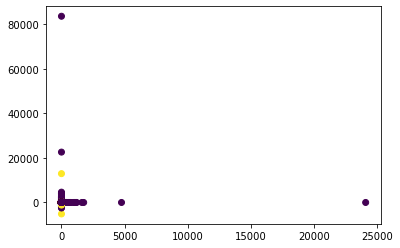

In [93]:
# Scatter plot
plt.scatter(
    # One feature on the x-axis
    x=data['current_ratio'],
    # Another feature on the y-axis
    y=data['total_debt_to_equity_ratio'],
    # And, the y variable displayed as the color
    c=data['status']
)

# Fit the model

In [94]:
# Separate the data into y and X
y = data["status"]
# The "X" column should be all the features
X = data.drop(columns="status")

In [95]:
X

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,...,1.382369,344.263,0.464594,0.243519,339.515,1.013985,2.182519,-1.004154,0.047454,0.103568
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,...,1.245637,305.379,0.435103,0.256445,340.212,0.897614,2.062990,-0.925326,0.026403,0.054469
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,...,0.899355,368.163,0.518394,0.306532,310.235,1.186723,2.289229,-0.703000,-0.082989,-0.189982
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,...,0.883074,368.233,0.536297,0.239809,294.988,1.248298,2.327623,-0.678689,-0.018074,-0.042070
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,...,0.919167,379.927,0.535643,0.350583,301.684,1.259354,2.351109,-0.670825,0.004940,0.011615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,...,0.094826,212.863,0.193670,0.168015,873.214,0.243770,1.258685,0.002072,0.022983,0.028929
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,...,0.156037,858.231,0.459949,0.412719,985.599,0.870771,1.893190,0.076610,0.069503,0.131583
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,...,0.097271,769.750,0.440806,0.391691,976.002,0.788677,1.789172,0.005713,-0.000826,-0.001477
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,...,0.093245,776.045,0.447002,0.399764,959.413,0.808875,1.809554,0.001523,-0.011751,-0.021264


In [96]:
y.describe()

count    78401.000000
mean         0.066453
std          0.249074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: status, dtype: float64

In [ ]:
# Split into testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y)

#X_train_scaled = StandardScaler().fit_transform(data[["X_train", "y_train"]])

# Train the logistic regression classifier
#logistic_regression_model = LogisticRegression()

# Then fit it
#logistic_regression_model.fit(X_train, y_train)

In [97]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [78]:
X.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
count,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,7.840100e+04,78401.000000,78401.000000,...,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000
mean,883.282228,1600.208119,121.657898,378.056101,202.322341,129.856537,287.810806,3.424908e+03,2372.213643,2876.590984,...,1.178458,1336.955808,1.636917,0.220034,1097.136539,2.773174,4.154664,-1.339494,-0.661278,-0.600429
std,3935.171474,8945.964231,653.504153,2015.384712,1062.596420,1267.668833,1338.255511,1.844409e+04,11970.551868,12939.814178,...,3.235762,5743.246027,40.445309,1.187877,5526.266728,316.551325,338.581398,16.577751,13.434044,144.863812
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1.977000,0.001000,...,-11.538462,0.001000,0.000041,-0.034901,-25560.000000,-5137.000000,-5846.000000,-2456.000000,-1515.000000,-31837.000000
25%,19.223000,17.447000,1.215000,-0.799000,0.006000,-7.421000,3.352000,3.525100e+01,28.035000,37.936000,...,0.480391,11.885000,0.248268,0.000000,13.806000,0.225890,1.272529,-1.075497,-0.138748,-0.143961
50%,101.370000,105.233000,8.027000,15.252000,7.154000,1.649000,23.071000,2.288150e+02,188.769000,215.367000,...,0.891089,68.891000,0.418435,0.102584,97.440000,0.634080,1.753401,-0.548868,0.017560,0.065524
75%,433.554000,639.214000,48.352000,140.452000,75.327000,40.446000,132.544000,1.251819e+03,1052.867000,1177.514000,...,1.459676,520.613000,0.609379,0.290148,479.605000,1.382474,2.662858,-0.223265,0.066489,0.165743
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,...,420.000000,230670.000000,6324.000000,188.222222,198528.000000,83585.250000,87702.500000,7.704981,244.833333,7770.333333


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78401 entries, 0 to 78681
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   current_assets                      78401 non-null  float64
 1   cost_of_goods_sold                  78401 non-null  float64
 2   depreciation_and_amortization       78401 non-null  float64
 3   EBITDA                              78401 non-null  float64
 4   inventory                           78401 non-null  float64
 5   net_income                          78401 non-null  float64
 6   total_receivables                   78401 non-null  float64
 7   market_value                        78401 non-null  float64
 8   net_sales                           78401 non-null  float64
 9   total_assets                        78401 non-null  float64
 10  total_long_term_debt                78401 non-null  float64
 11  EBIT                                78401

In [ ]:
## NEED TO SCALE DATA AND TRY AGAIN